<a href="https://colab.research.google.com/github/lordfiftyfive/Seattle-Tensorflow/blob/master/InstructionalptI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you do NOT have the following libraries installed on your local machine then you will want to:
 1. install anaconda navigator and install the spyder enviroment withen anaconda navigator 
 2. open up a terminal withen anaconda navigator and use conda install (name of library)



 
 

In [1]:
!pip install quandl

In [0]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import quandl
import pandas as pd

    First we are going to want to import our data here we are going to show how
     to import using one of the most common data format which is the csv file 

In [3]:
from google.colab import files
files.upload()

{}

In [0]:
 electricity = pd.read_csv('930-data-export.csv')

https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48?src=email

            Value
Date             
1977-03-31   6.44
1977-06-30   6.23
1977-09-30   4.93
1977-12-31   5.53
1978-03-31   6.13
...           ...
2015-03-31   1.83
2015-06-30   2.02
2015-09-30   1.62
2015-12-31   1.08
2016-03-31   1.82

[157 rows x 1 columns]
    Region Code  ... Total Interchange (MWh)
0          US48  ...                  2977.0
1          US48  ...                  3557.0
2          US48  ...                  3755.0
3          US48  ...                  3617.0
4          US48  ...                  3968.0
..          ...  ...                     ...
188        US48  ...                     NaN
189        US48  ...                     NaN
190        US48  ...                     NaN
191        US48  ...                     NaN
192        US48  ...                     NaN

[193 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


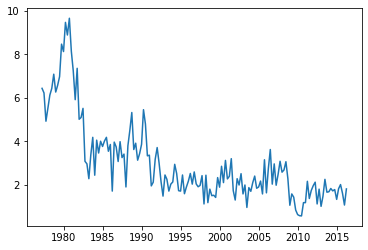

In [5]:

Data_to_predict = quandl.get("FRBP/GDPPLUS_042619",  collapse="quarterly")
datafive = quandl.get("FRED/PCETRIM1M158SFRBDAL",  collapse="quarterly", start_date="1977-02-01",end_date="2016-03-31")#quandl.get("FRED/VALEXPUSM052N", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="quarterly", start_date="1960-09-30")#quandl.get("WWDI/USA_NE_GDI_TOTL_CD", authtoken="DNMZo2iRzVENxpxqHBKF", start_date="1970-12-31")
Data_To_predict = Data_to_predict.values
#the below column reduces the dimension of the data set by 1. We need to do this sometimes in order to put it into a pandas dataframe which we can easily manipulate
electricity = np.squeeze(electricity,axis=1)
electricity= pd.DataFrame(electricity)
datafive= pd.DataFrame(datafive)
plt.plot(datafive)
print(datafive)
print(electricity)
X[:, None] 

[[0.64537445]
 [0.6222467 ]
 [0.47907489]
 [0.54515419]
 [0.61123348]
 [0.64537445]
 [0.71696035]
 [0.62665198]
 [0.66079295]
 [0.70484581]
 [0.86894273]
 [0.8314978 ]
 [0.97907489]
 [0.91519824]
 [1.        ]
 [0.83259912]
 [0.73348018]
 [0.58810573]
 [0.74669604]
 [0.48898678]
 [0.49779736]
 [0.54405286]
 [0.27643172]
 [0.26321586]
 [0.18832599]
 [0.30837004]
 [0.39757709]
 [0.20594714]
 [0.38325991]
 [0.31828194]
 [0.3777533 ]
 [0.35132159]
 [0.37885463]
 [0.39757709]
 [0.32709251]
 [0.36123348]
 [0.12555066]
 [0.37334802]
 [0.34911894]
 [0.2753304 ]
 [0.37555066]
 [0.29515419]
 [0.31277533]
 [0.14647577]
 [0.35462555]
 [0.43281938]
 [0.52312775]
 [0.33590308]
 [0.36784141]
 [0.28193833]
 [0.31497797]
 [0.3623348 ]
 [0.53744493]
 [0.46475771]
 [0.30396476]
 [0.30726872]
 [0.15198238]
 [0.17070485]
 [0.28634361]
 [0.34581498]
 [0.26651982]
 [0.17290749]
 [0.10022026]
 [0.20704846]
 [0.18502203]
 [0.12555066]
 [0.16079295]
 [0.17180617]
 [0.26101322]
 [0.21475771]
 [0.1277533 ]
 [0.12

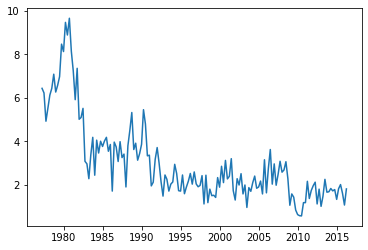

In [6]:
#Standardize the data

#note on minmaxScalar vs standard scalar using standard scalar is generally inadvisable because of the fact that standard scalar tries to force the data to conform to a standard normal distribution. if the data does not conform to a
#standard normal distribution this can end up distorting the data. 
Scalar = MinMaxScaler(feature_range=(0,1))

b = Scalar.fit_transform(datafive)

#b = np.log10(b)


plt.plot(datafive)
print(b)

In [0]:
#filling and eliminating missing data filling and eliminating missing data
#I think this one is about dropping the time index column from the data
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

final_data = imp.fit_transform(datafive)
#print(a)
#datasix = datasix.drop(datasix.index[0])
#Data_to_predict.values
#datasix = datasix.dropna()
#datafive = datafive.fillna(0)
#unfortunately dropna() and fillna(0) are not very good solutions what if there were a better way?
pca = PCA()
final_data = pca.fit_transform(final_data)

#winsorization is for getting rid of outlier values in the data 
final_data = 	winsorize(final_data)


final_data = pd.DataFrame(final_data)


In [8]:
#what if we want to use two or more datasets in order to predict values in the third dataset? or we want to a dataset which says what category that dataset is in? we can use pd.concat for that 
from sklearn.model_selection import train_test_split

final_data= pd.concat([final_data,electricity],axis=1)# what this does is make sure that the datasets are connectet horizontally. so the other dataset basically becomes a second column in the new consolidated dataset. 

#.pca
#you HAVE to convert your pandas dataframes into arrays before you can feed it into any ml or deep learning neural network or algorithm
#higher order derivative(s) of values are easier for a machine learning algorithm to predict then the actual values
electricity = np.array(electricity)
electricity = np.diff(electricity)
final_data = np.array(final_data)
final_data = np.diff(final)_data
#generally you will only need to expand the number of dimensions of the dataset when you are working with RNNs or recurrent neural networks. 
electricity = np.expand_dims(electricity,axis=1)
#this is dummy y data
y = np.zeros(256)
y = np.array(y)
#whatever your y= will go here 
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.33, random_state=42)

TypeError: ignored

In [0]:
#if enough time reamains go into various data visualization such as data decomposition, graphing and confidence intervals sns library. 